CASE STUDY II: PREDIKSI TINGKAT KEPUASAN KARYAWAN

Dataset: employee_data

Mr. Kim adalah seorang data scientist di sebuah start-up. Dia ditugaskan oleh HR untuk memprediksi tingkat kepuasan para karyawan di perusahaannya. Bantu Mr. Kim untuk melakukan hal-hal berikut.


CATATANNNN:
1. Setiap langkah harus diberi dokumentasi (Penjelasan)
2. Setiap visualisasi harus diberi interpretasi

# Business Understanding

> User: HR

> Permasalahan: HR ingin mengetahui seberapa puas karyawan dalam bekerja

> Kebutuhan: Data Employee

In [ ]:
'''
Import Modul
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
'''
Import Modul untuk Mengambil Data via Drive
'''

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Data Undertanding

In [ ]:
'''
Get The Data
'''
data = drive.CreateFile({'id':'1voPFe_rsk0xIT4glW5PfodVH885D_wGI'})
data.GetContentFile('data.csv')

In [ ]:
'''
Read The Data
'''
df = pd.read_csv('data.csv')
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [ ]:
'''
Data shape
'''
df.shape

(15787, 10)

In [ ]:
'''
Data Description
'''
df.describe(include='all')

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,NaN,NaN
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,NaN,NaN
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,NaN,NaN
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,NaN,NaN
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,NaN,NaN
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,NaN,NaN


In [ ]:
'''
Data Type
'''
df.dtypes

Emp ID                   float64
satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
promotion_last_5years    float64
dept                      object
salary                    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


In [ ]:
'''
Data Numerikal
'''

num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0


In [ ]:
'''
Data kategorikal
'''

cat_df = df.drop(num_df, axis = 1)
cat_df.head()

,dept,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


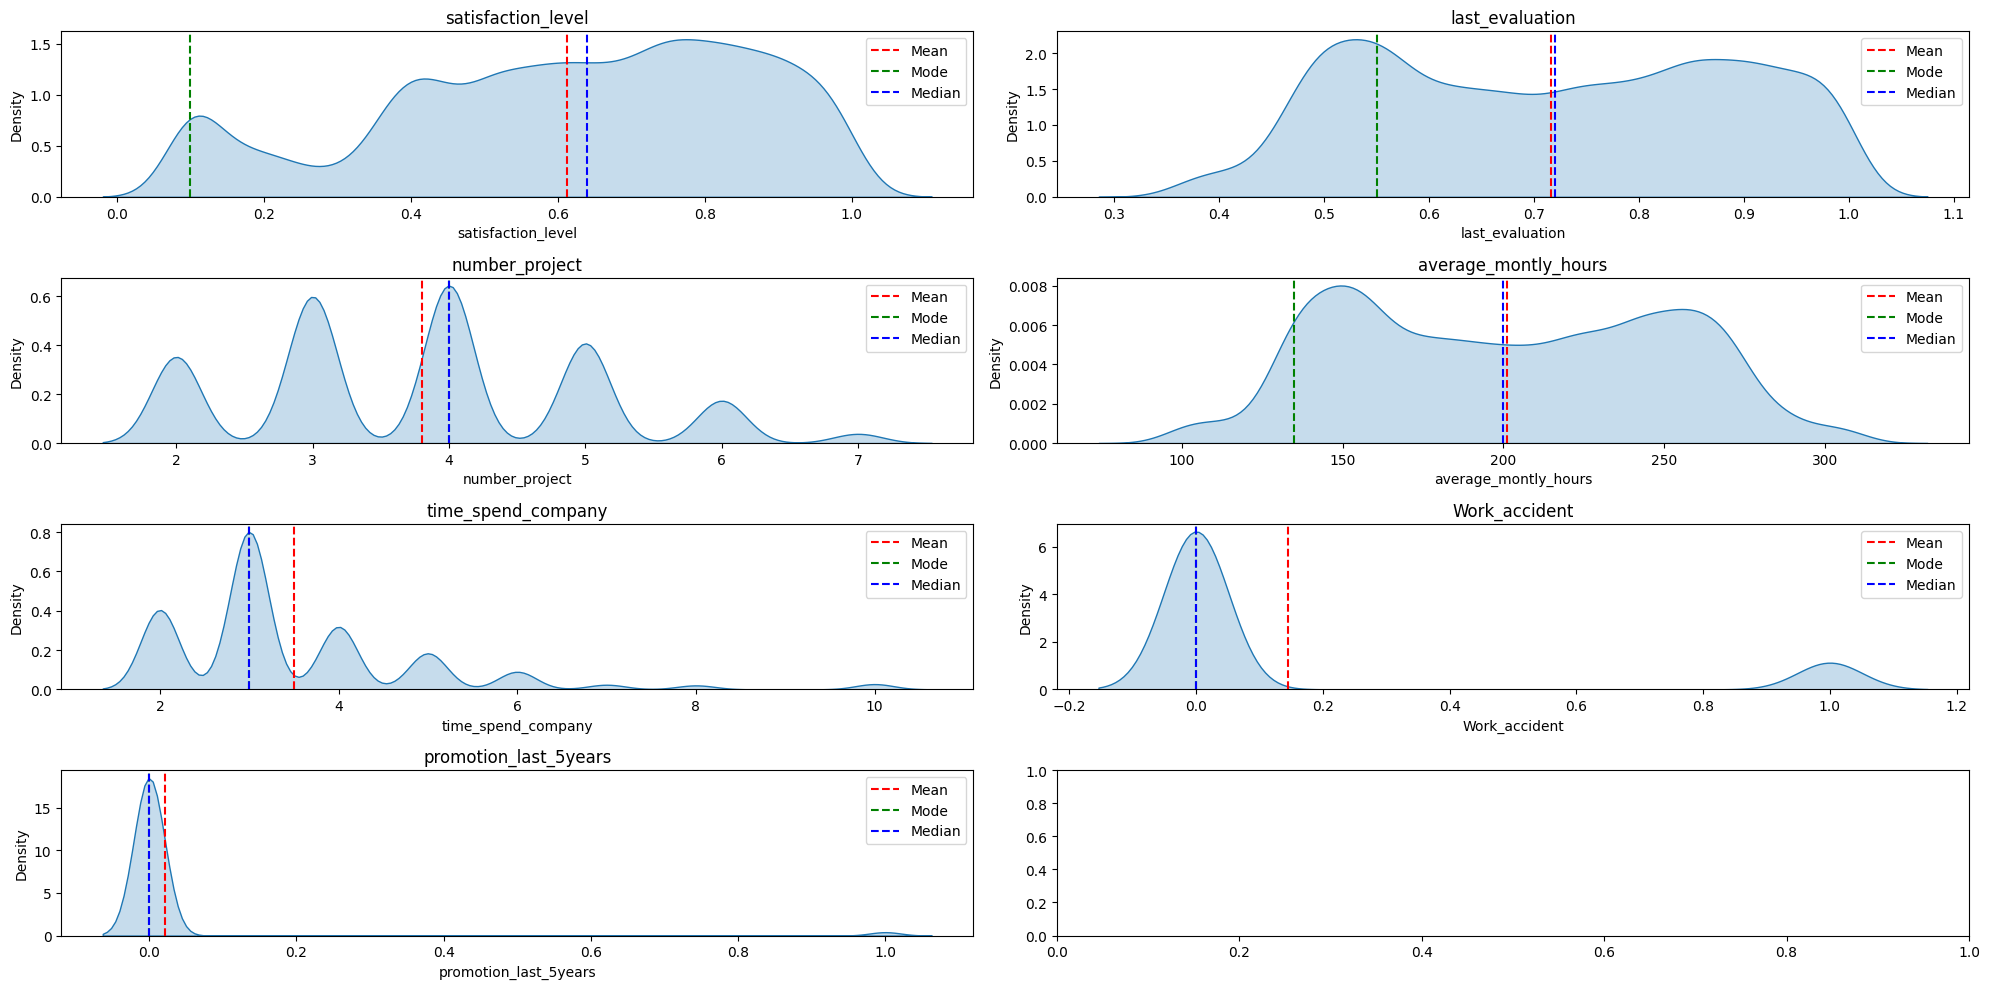

In [ ]:
'''
Distribusi Numerikal
'''
# fig, axes = plt.subplots(BARIS, KOLOM, figsize=(20, 10))
fig, axes = plt.subplots(4, 2, figsize=(20, 10))

for i, attr in enumerate(num_df.drop(['Emp ID'], axis=1)):
    row = i // 2
    col = i % 2
    sns.kdeplot(data=num_df[attr], ax=axes[row, col], fill=True)
    axes[row, col].set_title(attr)

    mean_val = num_df[attr].mean()
    mode_val = num_df[attr].mode().iloc[0]
    median_val = num_df[attr].median()

    axes[row, col].axvline(mean_val, color='r', linestyle='--', label='Mean')
    axes[row, col].axvline(mode_val, color='g', linestyle='--', label='Mode')
    axes[row, col].axvline(median_val, color='b', linestyle='--', label='Median')

    axes[row, col].legend()

plt.tight_layout()

plt.show()

In [ ]:
cat_df.columns

Index(['dept', 'salary'], dtype='object')

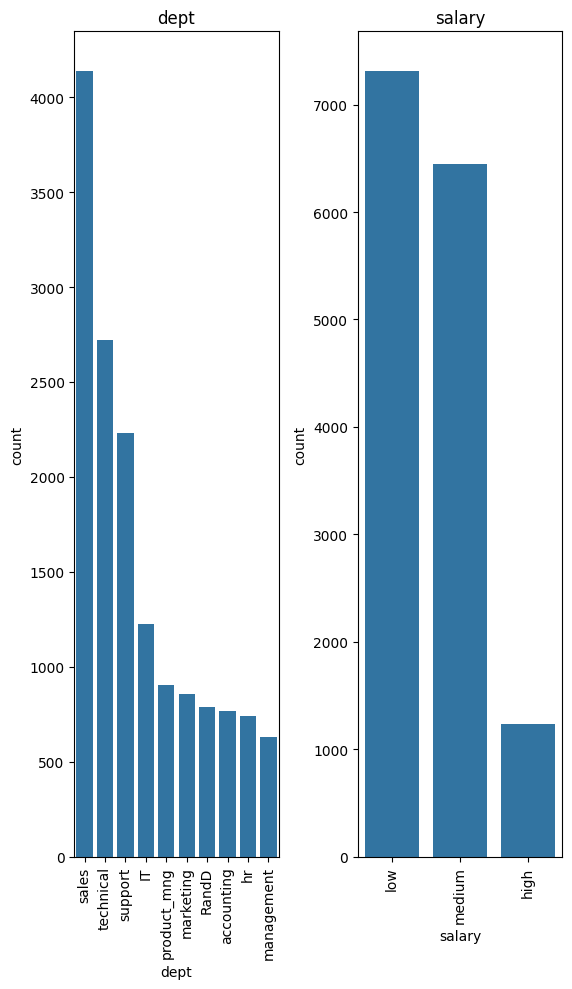

In [ ]:
'''
Distribusi Kategorikal
'''

plt.figure(figsize=(20, 10))

for i, column in enumerate(cat_df.columns):
    plt.subplot(1, 7, i+1)
    top_10_values = cat_df[column].value_counts().head(10)
    sns.countplot(data=cat_df, x=column, order=top_10_values.index)
    plt.title(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

# Data Preparation

In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,Emp ID,float64,788,4.99,14999,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1,satisfaction_level,float64,788,4.99,92,"[0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,..."
2,last_evaluation,float64,788,4.99,65,"[0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85..."
3,number_project,float64,788,4.99,6,"[2.0, 5.0, 7.0, 6.0, 4.0, 3.0, nan]"
4,average_montly_hours,float64,788,4.99,215,"[157.0, 262.0, 272.0, 223.0, 159.0, 153.0, 247..."
5,time_spend_company,float64,788,4.99,8,"[3.0, 6.0, 4.0, 5.0, 2.0, 8.0, 10.0, 7.0, nan]"
6,Work_accident,float64,788,4.99,2,"[0.0, 1.0, nan]"
7,promotion_last_5years,float64,788,4.99,2,"[0.0, 1.0, nan]"
8,dept,object,788,4.99,10,"[sales, accounting, hr, technical, support, ma..."
9,salary,object,788,4.99,3,"[low, medium, high, nan]"


## Ubah Tipe Data :D

In [ ]:
diskrit_data = [
  'number_project',
  'time_spend_company',
  'Work_accident',
  'promotion_last_5years',
  ]

for i in diskrit_data:
    df[i] = df[i].astype(np.object)

<ipython-input-140-44c77efbeeee>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[i] = df[i].astype(np.object)


In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,Emp ID,float64,788,4.99,14999,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1,satisfaction_level,float64,788,4.99,92,"[0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,..."
2,last_evaluation,float64,788,4.99,65,"[0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85..."
3,number_project,object,788,4.99,6,"[2.0, 5.0, 7.0, 6.0, 4.0, 3.0, nan]"
4,average_montly_hours,float64,788,4.99,215,"[157.0, 262.0, 272.0, 223.0, 159.0, 153.0, 247..."
5,time_spend_company,object,788,4.99,8,"[3.0, 6.0, 4.0, 5.0, 2.0, 8.0, 10.0, 7.0, nan]"
6,Work_accident,object,788,4.99,2,"[0.0, 1.0, nan]"
7,promotion_last_5years,object,788,4.99,2,"[0.0, 1.0, nan]"
8,dept,object,788,4.99,10,"[sales, accounting, hr, technical, support, ma..."
9,salary,object,788,4.99,3,"[low, medium, high, nan]"


In [ ]:
'''
Data Kontinu
'''

kon_df = df.select_dtypes(include=['int64', 'float64'])
kon_df.head()

,Emp ID,satisfaction_level,last_evaluation,average_montly_hours
0,1.0,0.38,0.53,157.0
1,2.0,0.80,0.86,262.0
2,3.0,0.11,0.88,272.0
3,4.0,0.72,0.87,223.0
4,5.0,0.37,0.52,159.0


In [ ]:
'''
Data Diskrit + Kategorikal
'''

disk_df = df.drop(kon_df, axis = 1)
disk_df.head()

,number_project,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2.0,3.0,0.0,0.0,sales,low
1,5.0,6.0,0.0,0.0,sales,medium
2,7.0,4.0,0.0,0.0,sales,medium
3,5.0,5.0,0.0,0.0,sales,low
4,2.0,3.0,0.0,0.0,sales,low


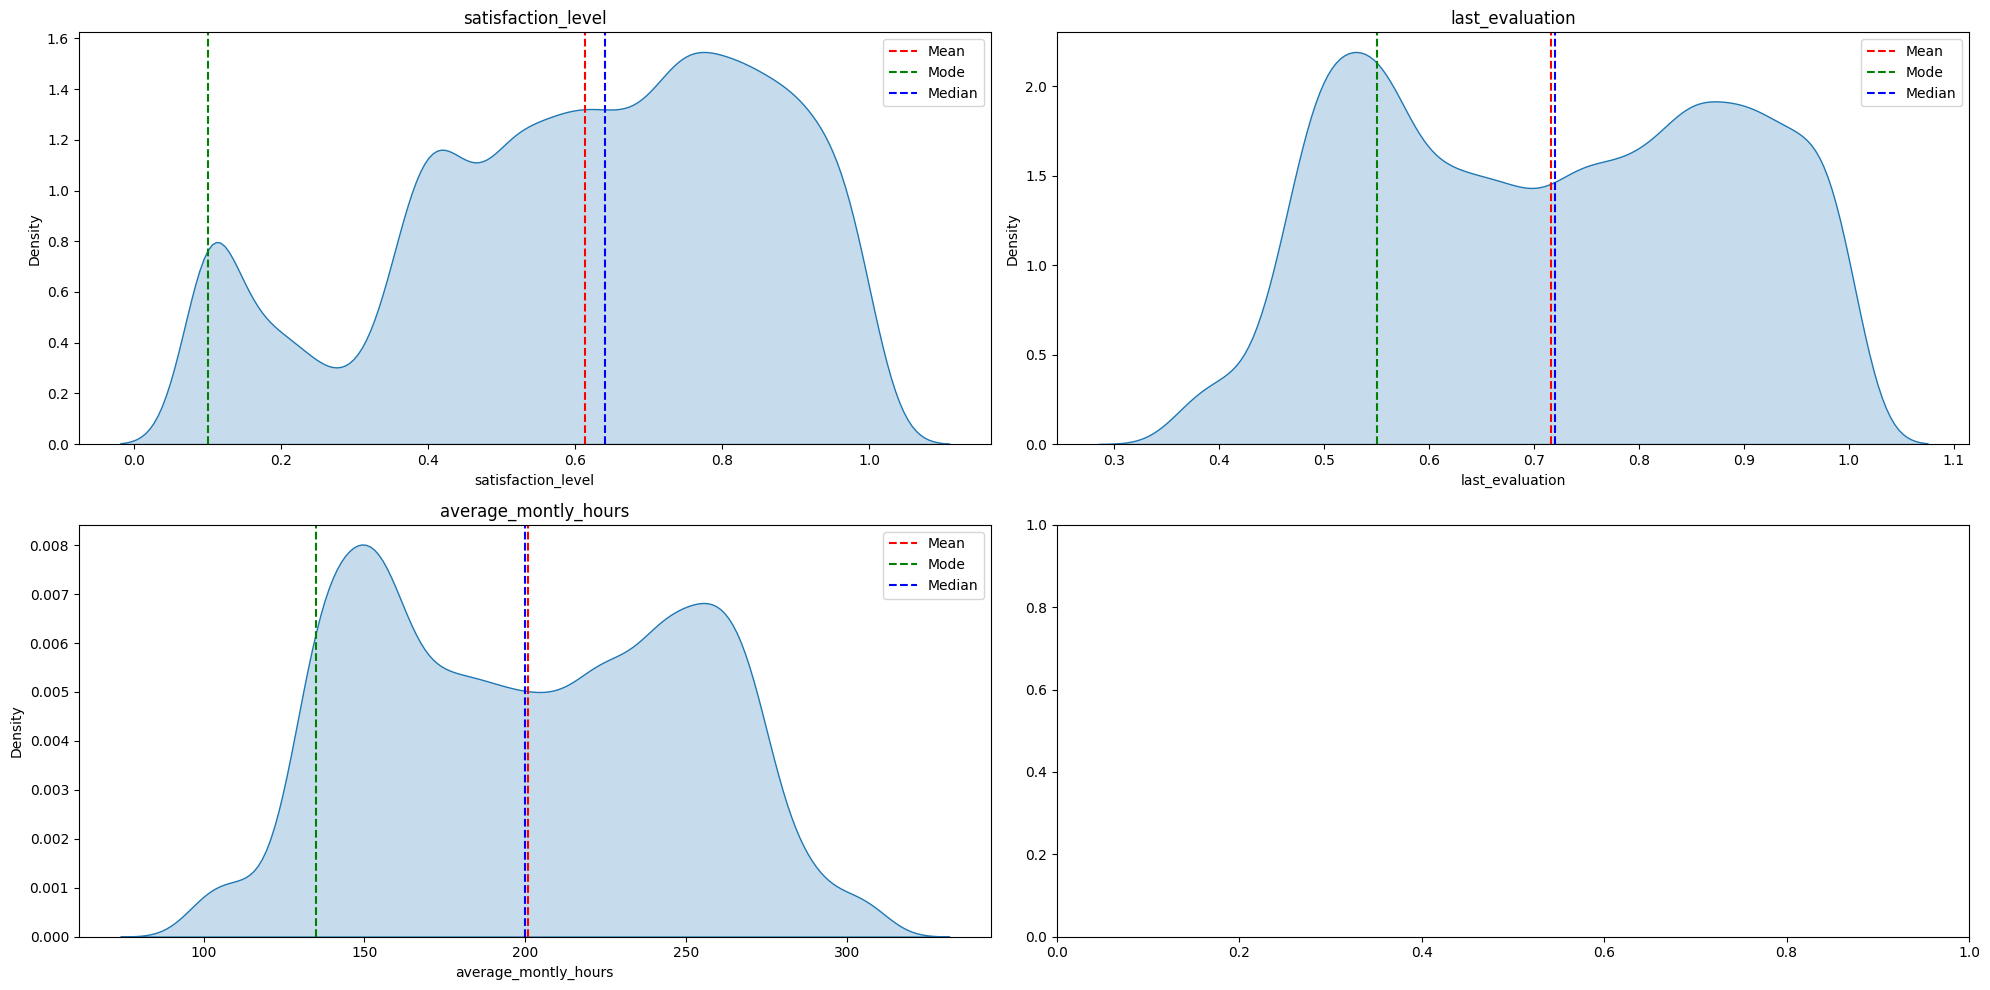

In [ ]:
'''
Distribusi Kontinu
'''

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, attr in enumerate(kon_df.drop(['Emp ID'], axis=1)):
    row = i // 2
    col = i % 2
    sns.kdeplot(data=kon_df[attr], ax=axes[row, col], fill=True)
    axes[row, col].set_title(attr)

    mean_val = kon_df[attr].mean()
    mode_val = kon_df[attr].mode().iloc[0]
    median_val = kon_df[attr].median()

    axes[row, col].axvline(mean_val, color='r', linestyle='--', label='Mean')
    axes[row, col].axvline(mode_val, color='g', linestyle='--', label='Mode')
    axes[row, col].axvline(median_val, color='b', linestyle='--', label='Median')

    axes[row, col].legend()

plt.tight_layout()

plt.show()

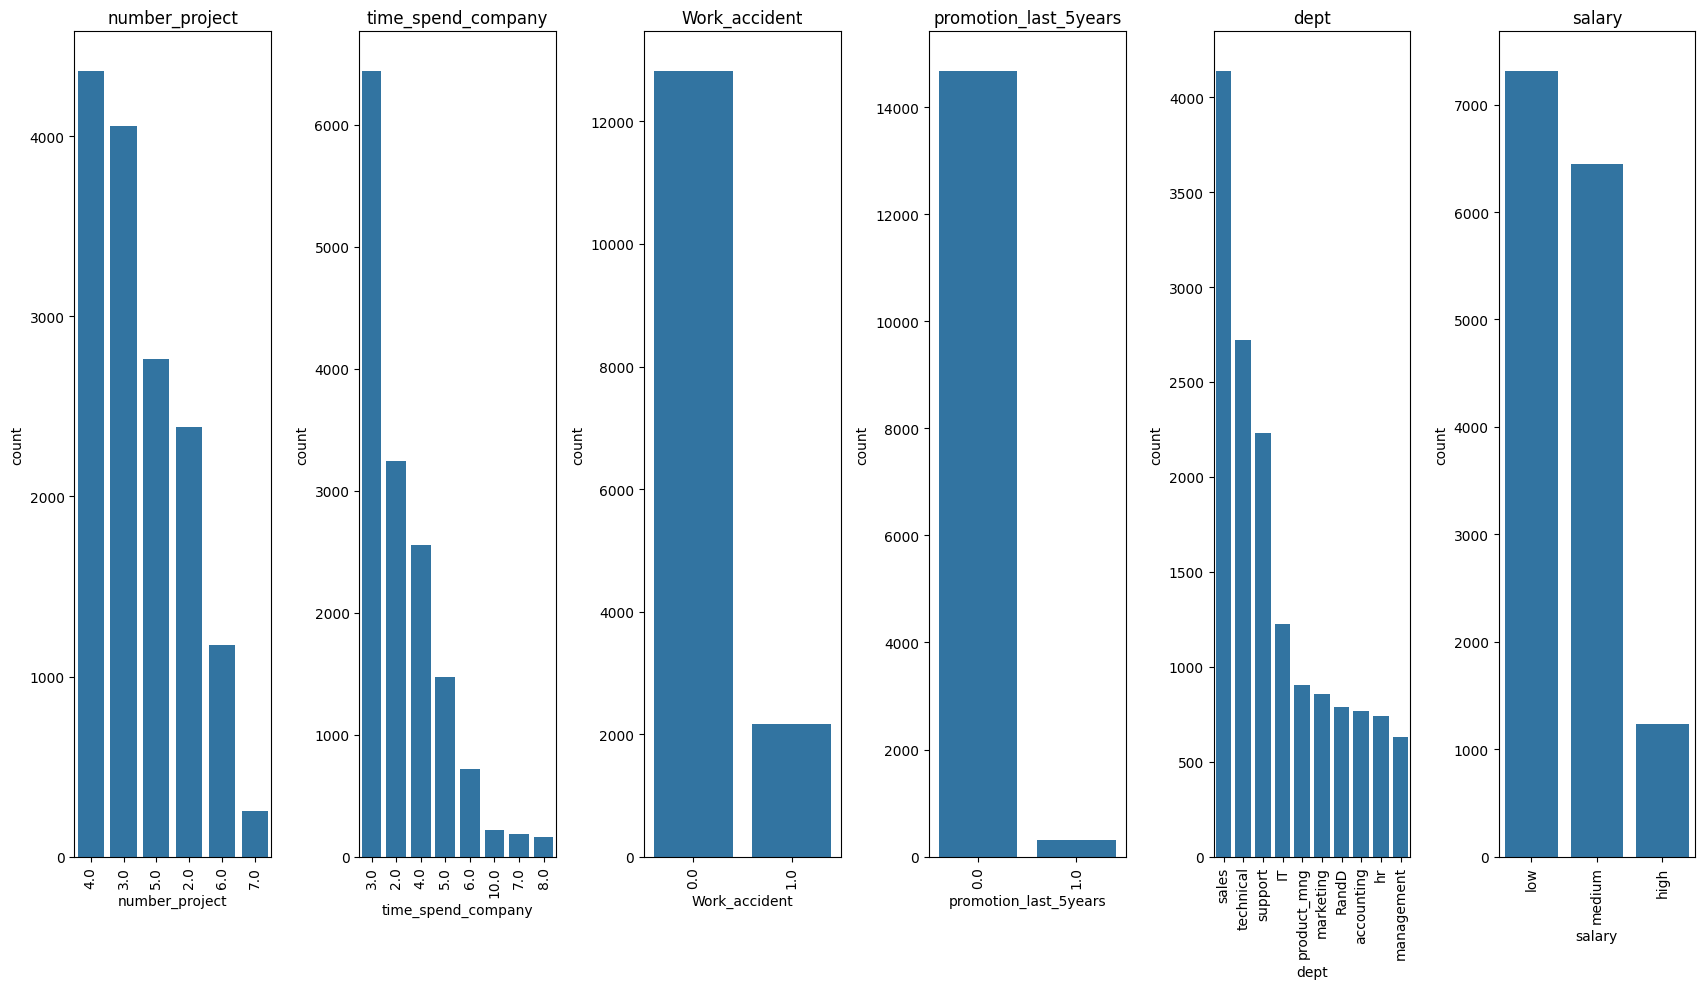

In [ ]:
'''
Distribusi Diskrit + Kategorikal
'''

plt.figure(figsize=(20, 10))

for i, column in enumerate(disk_df.columns):
    plt.subplot(1, 7, i+1)
    top_10_values = disk_df[column].value_counts().head(10)
    sns.countplot(data=disk_df, x=column, order=top_10_values.index)
    plt.title(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
df.corr()

<ipython-input-110-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Emp ID,satisfaction_level,last_evaluation,average_montly_hours
Emp ID,1.000000,0.045841,-0.018168,-0.009850
satisfaction_level,0.045841,1.000000,0.105021,-0.020048
last_evaluation,-0.018168,0.105021,1.000000,0.339742
average_montly_hours,-0.009850,-0.020048,0.339742,1.000000


## Rename Column

In [ ]:
df.rename(columns={'Emp ID': 'emp_id'}, inplace=True)
df.columns

Index(['emp_id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

## Missing Value

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,emp_id,float64,788,4.99,14999,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1,satisfaction_level,float64,788,4.99,92,"[0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,..."
2,last_evaluation,float64,788,4.99,65,"[0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85..."
3,number_project,object,788,4.99,6,"[2.0, 5.0, 7.0, 6.0, 4.0, 3.0, nan]"
4,average_montly_hours,float64,788,4.99,215,"[157.0, 262.0, 272.0, 223.0, 159.0, 153.0, 247..."
5,time_spend_company,object,788,4.99,8,"[3.0, 6.0, 4.0, 5.0, 2.0, 8.0, 10.0, 7.0, nan]"
6,Work_accident,object,788,4.99,2,"[0.0, 1.0, nan]"
7,promotion_last_5years,object,788,4.99,2,"[0.0, 1.0, nan]"
8,dept,object,788,4.99,10,"[sales, accounting, hr, technical, support, ma..."
9,salary,object,788,4.99,3,"[low, medium, high, nan]"


Karena persentasi NILAI EMPLOYEE ID YANG NULL, drop saja baris yang ada NULL 😊

In [ ]:
# df.dropna(inplace=True)

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,emp_id,float64,788,4.99,14999,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1,satisfaction_level,float64,788,4.99,92,"[0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,..."
2,last_evaluation,float64,788,4.99,65,"[0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85..."
3,number_project,object,788,4.99,6,"[2.0, 5.0, 7.0, 6.0, 4.0, 3.0, nan]"
4,average_montly_hours,float64,788,4.99,215,"[157.0, 262.0, 272.0, 223.0, 159.0, 153.0, 247..."
5,time_spend_company,object,788,4.99,8,"[3.0, 6.0, 4.0, 5.0, 2.0, 8.0, 10.0, 7.0, nan]"
6,Work_accident,object,788,4.99,2,"[0.0, 1.0, nan]"
7,promotion_last_5years,object,788,4.99,2,"[0.0, 1.0, nan]"
8,dept,object,788,4.99,10,"[sales, accounting, hr, technical, support, ma..."
9,salary,object,788,4.99,3,"[low, medium, high, nan]"


## Data Duplikasi

In [ ]:
df.duplicated().value_counts()

False    15000
True       787
dtype: int64

## CASE LAIN JIKA ID_EMP ADA, DATA YANG LAIN TIDAK ADA

Karena persentasi nilai null kecil, pilihannya ada 2

1. Drop baris NULL
2. Isi dengan nilai lain (AKU PILIH INI) 😊

In [ ]:
kon_df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation',
       'average_montly_hours'],
      dtype='object')

In [ ]:
'''
Data Numerikal
Karena Data Skewed, dan cukup ada bimodal. Aku pilih menggunakan median.
'''
df['satisfaction_level'].fillna(df['satisfaction_level'].median(), inplace=True)
df['last_evaluation'].fillna(df['last_evaluation'].median(), inplace=True)
df['average_montly_hours'].fillna(df['average_montly_hours'].median(), inplace=True)

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,emp_id,float64,788,4.99,14999,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1,satisfaction_level,float64,0,0.00,92,"[0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,..."
2,last_evaluation,float64,0,0.00,65,"[0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85..."
3,number_project,object,788,4.99,6,"[2.0, 5.0, 7.0, 6.0, 4.0, 3.0, nan]"
4,average_montly_hours,float64,0,0.00,215,"[157.0, 262.0, 272.0, 223.0, 159.0, 153.0, 247..."
5,time_spend_company,object,788,4.99,8,"[3.0, 6.0, 4.0, 5.0, 2.0, 8.0, 10.0, 7.0, nan]"
6,Work_accident,object,788,4.99,2,"[0.0, 1.0, nan]"
7,promotion_last_5years,object,788,4.99,2,"[0.0, 1.0, nan]"
8,dept,object,788,4.99,10,"[sales, accounting, hr, technical, support, ma..."
9,salary,object,788,4.99,3,"[low, medium, high, nan]"


In [ ]:
disk_df.columns

Index(['number_project', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [ ]:
'''
Data Kategorikal dan diskrit
'''
df['number_project'].fillna(df['number_project'].mode()[0], inplace=True)
df['time_spend_company'].fillna(df['time_spend_company'].mode()[0], inplace=True)
df['promotion_last_5years'].fillna(df['promotion_last_5years'].mode()[0], inplace=True)
df['dept'].fillna(df['dept'].mode()[0], inplace=True)
df['salary'].fillna(df['salary'].mode()[0], inplace=True)
df['Work_accident'].fillna(df['Work_accident'].mode()[0], inplace=True)

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,emp_id,float64,788,4.99,14999,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1,satisfaction_level,float64,0,0.00,92,"[0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,..."
2,last_evaluation,float64,0,0.00,65,"[0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85..."
3,number_project,float64,0,0.00,6,"[2.0, 5.0, 7.0, 6.0, 4.0, 3.0]"
4,average_montly_hours,float64,0,0.00,215,"[157.0, 262.0, 272.0, 223.0, 159.0, 153.0, 247..."
5,time_spend_company,float64,0,0.00,8,"[3.0, 6.0, 4.0, 5.0, 2.0, 8.0, 10.0, 7.0]"
6,Work_accident,float64,0,0.00,2,"[0.0, 1.0]"
7,promotion_last_5years,float64,0,0.00,2,"[0.0, 1.0]"
8,dept,object,0,0.00,10,"[sales, accounting, hr, technical, support, ma..."
9,salary,object,0,0.00,3,"[low, medium, high]"


## Outliers handling

Untuk outliers handling, kita perlu memisahkan data numerik dan data lainnya. Namun, sebelum itu, kita perlu mengecek kembali tipe data dari masing-masing fitur. Dari [grafik di atas](https://colab.research.google.com/drive/1cOwFYb6D9IGtD8uVNeSTT3xSk132II1i#scrollTo=cKfUJcOomYxC&line=14&uniqifier=1), didapatkan bahwa ternyata fitur atau kolom `Work_accident` dan `promotion_last_5years` merupakan data boolean, bukan numerik. Oleh karena itu, kita perlu mengubahnya terlebih dahulu.

In [ ]:
df['Work_accident'] = df['Work_accident'].astype(object)
df['promotion_last_5years'] = df['promotion_last_5years'].astype(object)
df.dtypes

emp_id                   float64
satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident             object
promotion_last_5years     object
dept                      object
salary                    object
dtype: object

In [ ]:
numerical_cols = df.select_dtypes(include=['float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

Untuk data numerik, karena distribusi datanya bimodal, maka aku pilih metoda IQR yang berpatokan kepada median. Kode di bawah ini akan mengeluarkan NaN jika ternyata suatu nilai merupakan outlier

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

not_outlier = df[(df[numerical_cols] > (lower_bound)) & (df[numerical_cols] < (upper_bound))]

check_values(not_outlier)

,kolom,dataType,null,nullPercentage,unique,values
0,emp_id,float64,788,4.99,14999,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1,satisfaction_level,float64,0,0.00,92,"[0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,..."
2,last_evaluation,float64,0,0.00,65,"[0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85..."
3,number_project,float64,0,0.00,6,"[2.0, 5.0, 7.0, 6.0, 4.0, 3.0]"
4,average_montly_hours,float64,0,0.00,215,"[157.0, 262.0, 272.0, 223.0, 159.0, 153.0, 247..."
5,time_spend_company,float64,1282,8.12,4,"[3.0, nan, 4.0, 5.0, 2.0]"
6,Work_accident,object,15787,100.00,0,[nan]
7,promotion_last_5years,object,15787,100.00,0,[nan]
8,dept,object,15787,100.00,0,[nan]
9,salary,object,15787,100.00,0,[nan]


Dari sini dapat dilihat bahwa time_spend_company memiliki 8.12% data null, hal ini menunjukkan bahwa data tersebut adalah data outlier (karena jika dia tidak outlier maka angka tidak akan berubah menjadi nan)

In [ ]:
# replace nilai df[numerical_cols] dengan not_outlier[numerical_cols]
df[numerical_cols]=not_outlier[numerical_cols]
df

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,False,False,sales,low
1,2.0,0.80,0.86,5.0,262.0,NaN,False,False,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,False,False,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,False,False,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,False,False,sales,low
...,...,...,...,...,...,...,...,...,...,...
15782,14995.0,0.40,0.57,2.0,151.0,3.0,False,False,support,low
15783,14996.0,0.37,0.48,2.0,160.0,3.0,False,False,support,low
15784,14997.0,0.37,0.53,2.0,143.0,3.0,False,False,support,low
15785,14998.0,0.11,0.96,6.0,280.0,4.0,False,False,support,low


Sampai sini, dapat dilihat bahwa yang nilai NaN hanya angka outlier saja, dan karena dari tabel value di atas ditunjukkan bahwa data NaN nya < 10%, maka dapat dihapus saja

In [ ]:
df=df.dropna()
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,emp_id,float64,0,0.0,13717,"[1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,..."
1,satisfaction_level,float64,0,0.0,92,"[0.38, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92, 0.89..."
2,last_evaluation,float64,0,0.0,65,"[0.53, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85, 1.0,..."
3,number_project,float64,0,0.0,6,"[2.0, 7.0, 5.0, 6.0, 4.0, 3.0]"
4,average_montly_hours,float64,0,0.0,215,"[157.0, 272.0, 223.0, 159.0, 153.0, 247.0, 259..."
5,time_spend_company,float64,0,0.0,4,"[3.0, 4.0, 5.0, 2.0]"
6,Work_accident,object,0,0.0,2,"[False, True]"
7,promotion_last_5years,object,0,0.0,2,"[False, True]"
8,dept,object,0,0.0,10,"[sales, accounting, hr, technical, support, ma..."
9,salary,object,0,0.0,3,"[low, medium, high]"


# Transformasi data

Contoh: Karena ingin diketahui korelasi level evaluasi antara departemen dan salary, maka dibuat pivot table dengan median sebagai valuenya

In [ ]:
pivot_table_df= pd.pivot_table(df, index='dept', columns='salary', values='satisfaction_level', aggfunc='median')
pivot_table_df

salary,high,low,medium
dept,,,
IT,0.650,0.650,0.660
RandD,0.610,0.690,0.655
accounting,0.630,0.600,0.595
hr,0.735,0.620,0.600
management,0.715,0.650,0.610
marketing,0.640,0.620,0.680
product_mng,0.650,0.635,0.650
sales,0.705,0.620,0.650
support,0.680,0.610,0.670
